In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import sklearn

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer, FunctionTransformer, MinMaxScaler

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import ast
from sklearn.feature_selection import SelectKBest, chi2
import math
from sklearn import preprocessing

In [2]:
soccer_data = pd.read_csv("soccer_analytics.csv")
soccer_data = soccer_data.drop(['Unnamed: 0'], axis=1)
soccer_data

,first_time,obstructing_players,aerial_won,redirect,follows_dribble,nearby_players,Backheel,Diving Header,Half Volley,Lob,Normal,Overhead Kick,Volley,Head,Foot,distance,dist_to_center,angle,goal_block
0,0,0,0,0,0,0.0,0,0,0,0,1,0,0,0,1,18.569868,14.0,16.664571,1
1,1,0,0,0,0,0.0,0,0,0,1,0,0,0,1,0,18.976301,6.3,22.520882,1
2,1,0,0,0,0,1.0,0,0,0,0,1,0,0,0,1,12.924782,10.8,20.879830,1
3,0,0,0,0,0,1.0,0,0,0,0,1,0,0,0,1,35.900139,0.1,12.714207,1
4,1,0,0,0,0,0.0,0,0,0,0,1,0,0,0,1,8.000000,4.8,47.418365,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20957,0,0,0,0,0,0.0,0,0,1,0,0,0,0,0,1,23.875720,7.4,18.193037,0
20958,1,0,0,0,0,0.0,0,0,0,0,1,0,0,0,1,16.658932,1.4,26.945242,0
20959,1,0,0,0,0,0.0,0,0,0,0,1,0,0,0,1,16.999412,12.7,18.482595,0
20960,0,0,0,0,0,1.0,0,0,0,0,1,0,0,0,1,25.904826,17.5,13.197215,0


In [3]:
auc_score = []
accuracies = []

In [4]:
X = soccer_data
y = soccer_data['goal_block']
X_train, X_test, y_train, y_test = train_test_split(X[['Volley', 'Overhead Kick', 'Normal', 'Lob', 'Half Volley', 'Diving Header', 'Backheel', 'nearby_players', 'follows_dribble', 'redirect', 'aerial_won']], y, test_size=0.35, random_state=42)

logreg = LogisticRegressionCV(max_iter=1000, class_weight = "balanced")                                # instantiate
logreg.fit(X_train, y_train)
    
y_pred = logreg.predict(X_test)
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
accuracies.append(acc)

auc = sklearn.metrics.roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
auc_score.append(auc)
    
auc_score

[0.5274387482872348]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X[["angle"]], y, test_size=0.35, random_state=42)

logreg = LogisticRegressionCV(max_iter=1000, class_weight = "balanced")                                # instantiate
logreg.fit(X_train, y_train)
    
y_pred = logreg.predict(X_test)
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
accuracies.append(acc)

auc = sklearn.metrics.roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
auc_score.append(auc)
    
auc_score

[0.5274387482872348, 0.7081704565120437]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X[["angle", "obstructing_players"]], y, test_size=0.35, random_state=42)

logreg = LogisticRegressionCV(max_iter=1000, class_weight = "balanced")                                # instantiate
logreg.fit(X_train, y_train)
    
y_pred = logreg.predict(X_test)
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
accuracies.append(acc)

auc = sklearn.metrics.roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
auc_score.append(auc)
    
accuracies

[0.6483576393621371, 0.727954204715824, 0.7270001362954887]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X[["angle","obstructing_players","distance"]], y, test_size=0.35, random_state=42)

logreg = LogisticRegressionCV(max_iter=1000, class_weight = "balanced")                                # instantiate
logreg.fit(X_train, y_train)
    
y_pred = logreg.predict(X_test)
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
accuracies.append(acc)

auc = sklearn.metrics.roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
auc_score.append(auc)
    
accuracies

[0.6483576393621371, 0.727954204715824, 0.7270001362954887, 0.6653945754395529]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X[["obstructing_players","angle","distance", "Foot"]], y, test_size=0.35, random_state=42)

logreg = LogisticRegressionCV(max_iter=1000, class_weight = "balanced")                                # instantiate
logreg.fit(X_train, y_train)
    
y_pred = logreg.predict(X_test)
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
accuracies.append(acc)

auc = sklearn.metrics.roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
auc_score.append(auc)
    
accuracies

[0.6483576393621371,
 0.727954204715824,
 0.7270001362954887,
 0.6653945754395529,
 0.6851574212893553]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X[["obstructing_players","angle","distance", "Head","Foot"]], y, test_size=0.35, random_state=42)

logreg = LogisticRegressionCV(max_iter=1000, class_weight = "balanced")                                # instantiate
logreg.fit(X_train, y_train)
    
y_pred = logreg.predict(X_test)
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
accuracies.append(acc)

auc = sklearn.metrics.roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
auc_score.append(auc)
    
accuracies

[0.6483576393621371,
 0.727954204715824,
 0.7270001362954887,
 0.6653945754395529,
 0.6851574212893553,
 0.684612239334878]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X[["obstructing_players","distance","Foot", "angle","first_time", "Head"]], y, test_size=0.35, random_state=42)

logreg = LogisticRegressionCV(max_iter=1000, class_weight = "balanced")                                # instantiate
logreg.fit(X_train, y_train)
    
y_pred = logreg.predict(X_test)
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
accuracies.append(acc)

auc = sklearn.metrics.roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
auc_score.append(auc)
    
accuracies

[0.6483576393621371,
 0.727954204715824,
 0.7270001362954887,
 0.6653945754395529,
 0.6851574212893553,
 0.684612239334878,
 0.6818863295624915]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X[["obstructing_players","distance","Foot", "Head","angle", "dist_to_center", "first_time"]], y, test_size=0.35, random_state=42)

logreg = LogisticRegressionCV(max_iter=1000, class_weight = "balanced")                                # instantiate
logreg.fit(X_train, y_train)
    
y_pred = logreg.predict(X_test)
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
accuracies.append(acc)

auc = sklearn.metrics.roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
auc_score.append(auc)
    
accuracies

[0.6483576393621371,
 0.727954204715824,
 0.7270001362954887,
 0.6653945754395529,
 0.6851574212893553,
 0.684612239334878,
 0.6818863295624915,
 0.6831129889600654]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X[["obstructing_players","distance","Foot", "Head","angle", "dist_to_center", "first_time", 'aerial_won']], y, test_size=0.35, random_state=42)

logreg = LogisticRegressionCV(max_iter=1000, class_weight = "balanced")                                # instantiate
logreg.fit(X_train, y_train)
    
y_pred = logreg.predict(X_test)
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
accuracies.append(acc)

auc = sklearn.metrics.roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
auc_score.append(auc)
    
auc_score

[0.5274387482872348,
 0.7081704565120437,
 0.7081237799745559,
 0.7192628022422105,
 0.7430396908741632,
 0.7428821381761972,
 0.742535708326536,
 0.7424536754749376,
 0.7453150557730348]

In [24]:
visuals = pd.DataFrame(data=auc_score[:8])
visuals = visuals.rename(columns={0:'Auc_Score'})
visuals = visuals.round(4)
visuals

,Auc_Score
0,0.5274
1,0.7082
2,0.7081
3,0.7193
4,0.7430
5,0.7429
6,0.7425
7,0.7425


In [25]:
Features = ['Without Selected Features', 'Only Angle', 'Add Obstruction', 'Add Distance', 'Add Foot', 'Add Head', 'Add First Time', 'Add Distance to Center']
visuals['Features'] = Features
visuals['Num Features'] = np.arange(1,9)
visuals

,Auc_Score,Features,Num Features
0,0.5274,Without Selected Features,1
1,0.7082,Only Angle,2
2,0.7081,Add Obstruction,3
3,0.7193,Add Distance,4
4,0.7430,Add Foot,5
5,0.7429,Add Head,6
6,0.7425,Add First Time,7
7,0.7425,Add Distance to Center,8


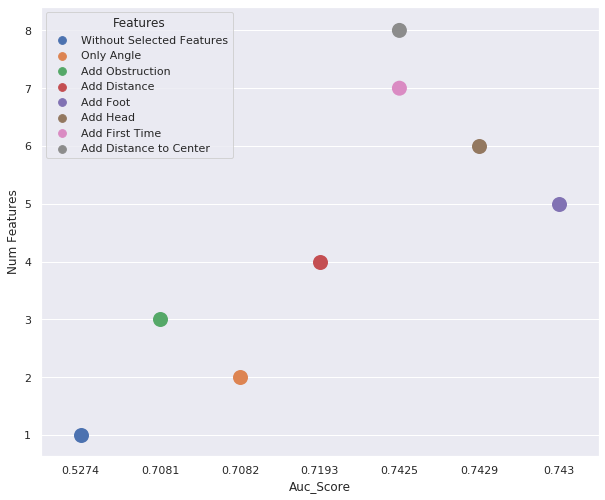

In [26]:
sns.set(rc={'figure.figsize':(10,8.27)})
sns.swarmplot(data=visuals, x='Auc_Score', y='Num Features', hue='Features', s=15)